<a href="https://colab.research.google.com/github/emmayeh-0211/2021AI_dl/blob/main/03_DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

import imgaug.augmenters as iaa
import imgaug as ia

(316, 316, 3)

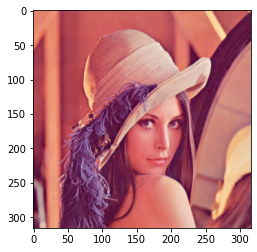

In [2]:
# Read image
img = io.imread('https://upload.wikimedia.org/wikipedia/zh/3/34/Lenna.jpg')
plt.imshow(img)
img.shape

In [3]:
# augmentation
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # 50% horizontal flip 水平翻轉
    iaa.Flipud(0.5), # 50% vertical flip 垂直翻轉
    iaa.Affine(
        rotate=(-10, 10), # random rotate -45 ~ +45 degree
        shear=(-4, 4), # random shear -16 ~ +16 degree
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)} # scale x, y: 80%~120%
    ),
])

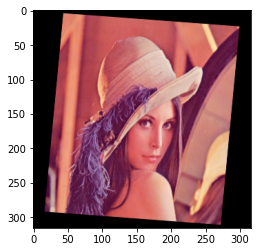

In [9]:
# Augment 1 image
img_aug = seq.augment_image(img)
plt.imshow(img_aug)

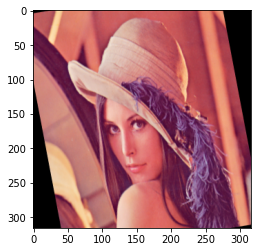

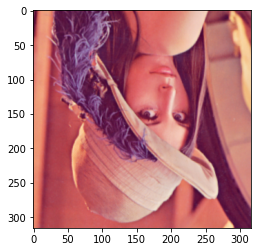

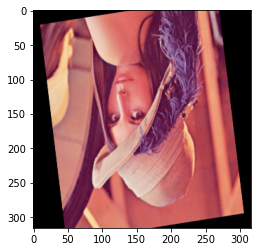

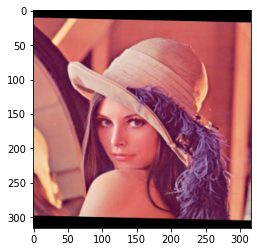

In [10]:
# Augment images (batch size = 4)
img_batch = np.stack([img]*4) # (4, 60, 184, 3)
img_aug_batch = seq.augment_images(img_batch)

for aug in img_aug_batch:
    plt.imshow(aug)
    plt.show()